# Fashion Mnist Classification

Data available <a href="https://www.kaggle.com/datasets/zalando-research/fashionmnist">here</a>

##### Steps
1. **<a href="#section_1">Importing Libraries</a>**
2. **<a href="#section_2">Normalization</a>**
3. **<a href="#section_3">Model Architecture Tuning</a>**
2. **<a href="#section_4">Visualize Final Model</a>**
3. **<a href="#section_5">Evaluate Final Model</a>**
3. **<a href="#section_6">Result</a>**

<div id="section_1"></div>

# Importing Libraries

In [1]:
# Data Wrangling
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical

# NN Components
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D
from keras.losses import CategoricalCrossentropy
from keras import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import accuracy_score,classification_report

# Visualization
import matplotlib.pyplot as plt
import visualkeras
from keras.utils.vis_utils import plot_model

# Memory
import gc

pd.set_option('display.max_columns',500)
%matplotlib inline  

In [2]:
df_train_images = pd.read_csv("data/fashion-mnist_train.csv")
df_train_images.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,...,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pi

In [3]:
df_train_labels = df_train_images[["label"]]
del df_train_images["label"]
df_train_images.shape

(60000, 784)

<div id="section_2"></div>

# Normalization


The size of images in dataset is **28x28**. In other words, an image consists of **784 pixels** in total. Each pixel can take values ​​between **0 and 255**. We need to normalize these pixels for faster training and better results.

In [4]:
max_value = df_train_images.max(numeric_only=True).max()
min_value = df_train_images.min(numeric_only=True).min()
f"Max value : {max_value} - Min value : {min_value}"

'Max value : 255 - Min value : 0'

In [5]:
X_train = df_train_images.apply(lambda x: x/255)
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,...,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740

In [6]:
X_train = X_train.values.reshape(-1,28,28,1)
y_train = df_train_labels.values

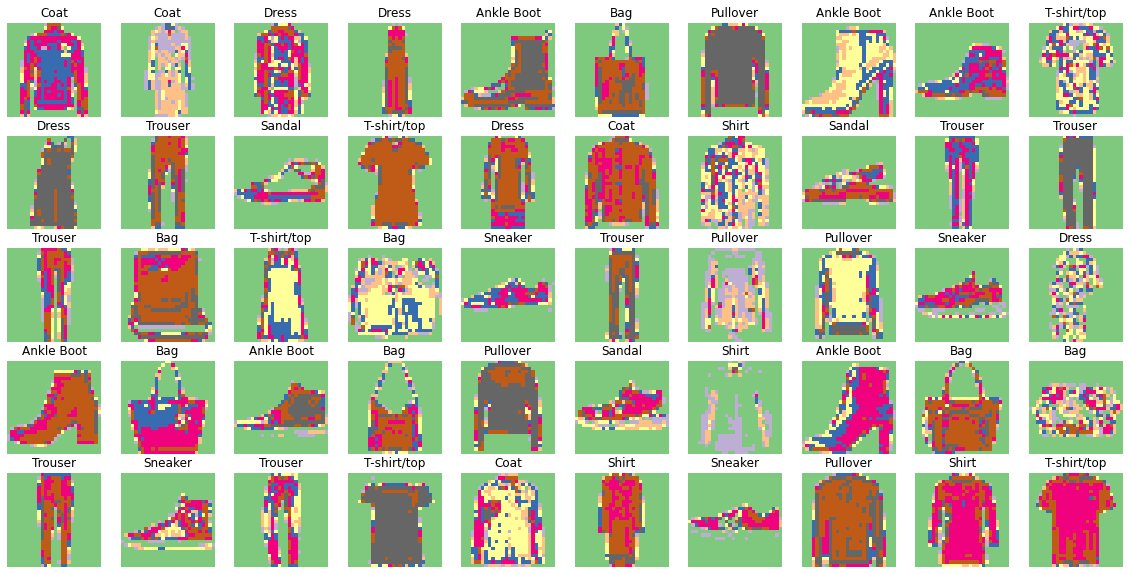

In [7]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
PLOT_ROWS = 5
PLOT_COLS = 10

def get_samples(n,x,y):
    assert type(x)==type(y)
    idxs = np.random.choice(len(x), replace = False, size = n)
    if isinstance(x,pd.DataFrame):
        ims = x.iloc[idxs]
        ims = ims.values.reshape(-1,28,28)
        labels = np.squeeze(y)[idxs].values
    elif isinstance(x,np.ndarray):
        ims = x[idxs].reshape(-1,28,28)
        labels = np.squeeze(y)[idxs]
    else:
        print("x and y are wrong types. must be DataFrame or np array")
    return ims,labels


ims, lbls = get_samples(PLOT_ROWS*PLOT_COLS,df_train_images,df_train_labels)
f, ax = plt.subplots(PLOT_ROWS,PLOT_COLS, figsize=(PLOT_COLS*2,PLOT_ROWS*2))
for i, (img,lbl) in enumerate(zip(ims,lbls)):
    ax[i//PLOT_COLS, i%PLOT_COLS].imshow(img, cmap="Accent")
    ax[i//PLOT_COLS, i%PLOT_COLS].axis('off')
    ax[i//PLOT_COLS, i%PLOT_COLS].set_title(labels[lbl])
plt.show()


<div id="section_3"></div>

# Model Architecture Tuning

To find the best model architecture, we need to tune different parameters of the model.

In [8]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Tune filter for model with 1 Conv2D layers

In [9]:
def tune_nn(filter1=16,batch_size=256,optimizer="adam"):
    nn = Sequential()
    nn.add(Conv2D(filter1, (3,3),input_shape=(28,28,1), activation='relu'))
    nn.add(MaxPool2D((2,2)))
    nn.add(Flatten())
    nn.add(Dense(128, activation='relu'))
    nn.add(Dense(64, activation='relu'))
    nn.add(Dense(10, activation='softmax'))
    nn.compile(loss=CategoricalCrossentropy(from_logits=False),
              optimizer=optimizer, metrics=["accuracy"])

    score = 0
    weights = nn.get_weights()
    for train_idxs, validation_idxs in skf.split(X_train, y_train):
        nn.set_weights(weights)
        X_train_part, y_train_part = X_train[train_idxs], to_categorical(y_train[train_idxs])
        X_val, y_val = X_train[validation_idxs], y_train[validation_idxs]
        nn.fit(X_train_part, y_train_part, epochs=10, batch_size=batch_size, verbose=0)
        y_pred = nn.predict(X_val)
        score += accuracy_score(y_val, y_pred.argmax(axis=1))
    return score/skf.n_splits

In [10]:
filters = [16,32,64]
scores = []
for filt in filters:
    score = tune_nn(filter1=filt)
    scores.append(score)
    gc.collect()
    print(f"Filters : {filt} _ Accuracy score : {score}")
filter1 = filters[np.argmax(scores)]
scores.clear()

Filters : 16 _ Accuracy score : 0.9068166666666666
Filters : 32 _ Accuracy score : 0.9121333333333332
Filters : 64 _ Accuracy score : 0.9151166666666667


### Tune batch size for model with 1 Conv2D layers

In [11]:
batch_sizes = [32,64,128,256]
for batch in batch_sizes:
    score = tune_nn(filter1=filter1,batch_size=batch)
    scores.append(score)
    gc.collect()
    print(f"Batch size : {batch} _ Accuracy score : {score}")
batch_size = batch_sizes[np.argmax(scores)]
scores.clear()

Batch size : 32 _ Accuracy score : 0.9141
Batch size : 64 _ Accuracy score : 0.9131333333333334
Batch size : 128 _ Accuracy score : 0.9171833333333334
Batch size : 256 _ Accuracy score : 0.91295


### Tune optimizer for model with 1 Conv2D layers

In [12]:
optimizers = {"Adam": "adam","SGD": SGD(momentum=0.9)}
optimizers_list = ["Adam","SGD"]
for name,opt in optimizers.items():
    score = tune_nn(filter1=filter1,batch_size=batch_size,optimizer=opt)
    scores.append(score)
    gc.collect()
    print(f"{name} accuracy score : {score}")
opt = optimizers[optimizers_list[np.argmax(scores)]]
scores.clear()

Adam accuracy score : 0.9125833333333334
SGD accuracy score : 0.9061333333333333


### Tune filters for model with 2 Conv2D layers

In [13]:
def tune_2layer_nn(filter2=16):
    nn = Sequential()
    nn.add(Conv2D(64, (3,3),input_shape=(28,28,1), activation='relu'))
    nn.add(MaxPool2D((2,2)))
    nn.add(Conv2D(filter2, (3,3), activation='relu'))
    nn.add(Flatten())
    nn.add(Dense(128, activation='relu'))
    nn.add(Dense(64, activation='relu'))
    nn.add(Dense(10, activation='softmax'))
    nn.compile(loss=CategoricalCrossentropy(from_logits=False),
              optimizer="adam", metrics=["accuracy"])

    score = 0
    weights = nn.get_weights()
    for train_idxs, validation_idxs in skf.split(X_train, y_train):
        nn.set_weights(weights)
        X_train_part, y_train_part = X_train[train_idxs], to_categorical(y_train[train_idxs])
        X_val, y_val = X_train[validation_idxs], y_train[validation_idxs]
        nn.fit(X_train_part, y_train_part, epochs=10, batch_size=256, verbose=0)
        y_pred = nn.predict(X_val)
        score += accuracy_score(y_val, y_pred.argmax(axis=1))
    return score/skf.n_splits

In [14]:
filters = [32,64,128]
for filt in filters:
    score = tune_2layer_nn(filter2=filt)
    scores.append(score)
    gc.collect()
    print(f"Filters : {filt} _ Accuracy score : {score}")
filter2 = filters[np.argmax(scores)]
scores.clear()

Filters : 32 _ Accuracy score : 0.9172833333333333
Filters : 64 _ Accuracy score : 0.9177333333333333
Filters : 128 _ Accuracy score : 0.9187166666666666


###  Best Model

In [15]:
def get_model():
    nn = Sequential()
    nn.add(Conv2D(filter1, (3,3),input_shape=(28,28,1), activation='relu'))
    nn.add(MaxPool2D((2,2)))
    nn.add(Conv2D(filter2, (3,3), activation='relu'))
    nn.add(Flatten())
    nn.add(Dense(128, activation='relu'))
    nn.add(Dense(64, activation='relu'))
    nn.add(Dense(10, activation='softmax'))
    nn.compile(loss=CategoricalCrossentropy(from_logits=False),
              optimizer=opt, metrics=["accuracy"])
    return nn

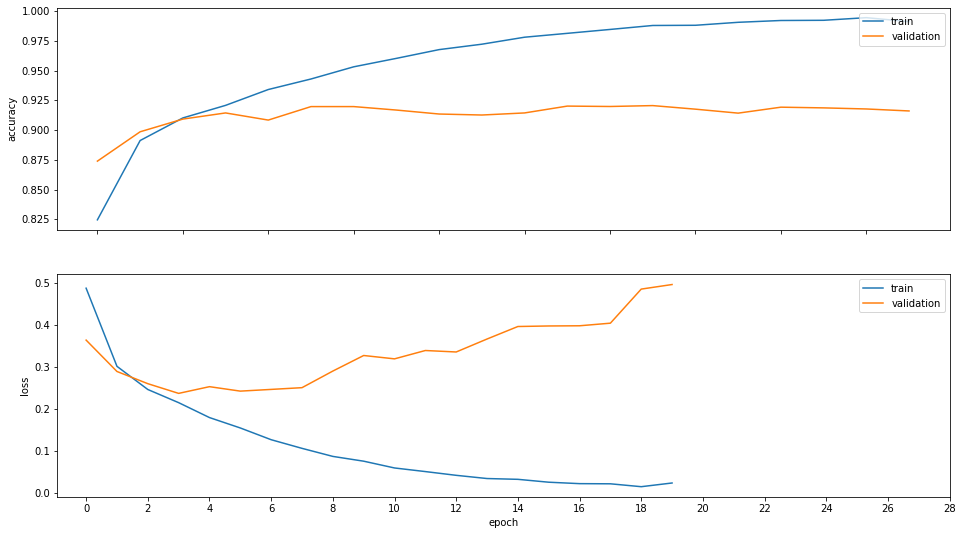

In [16]:
nn = get_model()
history = nn.fit(X_train,to_categorical(y_train),batch_size=batch_size,validation_split=0.2,epochs=20,verbose=0)
fig, (ax1, ax2) = plt.subplots(2,sharex="all",figsize=(16,9))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_xticks(np.arange(0, 30, 2))
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper right')
plt.show()


<div id="section_4"></div>

# Visualize Final Model

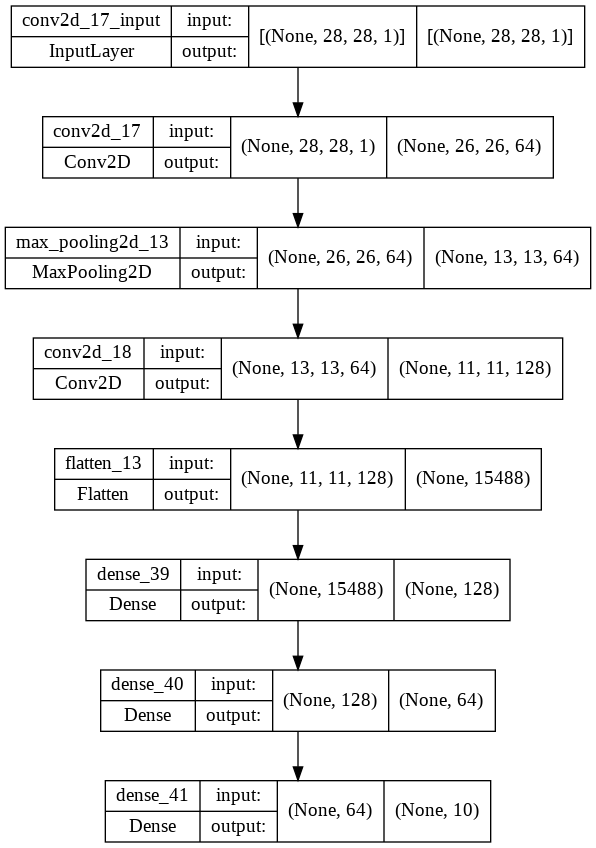

In [17]:
nn = get_model()
plot_model(nn, show_shapes=True, show_layer_names=True)

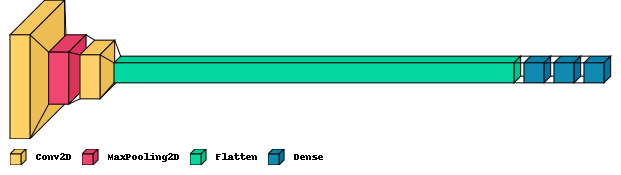

In [18]:
visualkeras.layered_view(nn,legend=True, draw_volume=True)

<div id="section_5"></div>

# Evaluate Final Model

In [19]:
history = nn.fit(X_train,to_categorical(y_train),batch_size=batch_size,epochs=7)

Epoch 1/7
469/469 [==============================] - 4s 8ms/step - loss: 0.4545 - accuracy: 0.8362
Epoch 2/7
469/469 [==============================] - 4s 8ms/step - loss: 0.2803 - accuracy: 0.8989
Epoch 3/7
469/469 [==============================] - 4s 8ms/step - loss: 0.2293 - accuracy: 0.9152
Epoch 4/7
469/469 [==============================] - 4s 8ms/step - loss: 0.1936 - accuracy: 0.9290
Epoch 5/7
469/469 [==============================] - 4s 8ms/step - loss: 0.1640 - accuracy: 0.9387
Epoch 6/7
469/469 [==============================] - 4s 8ms/step - loss: 0.1381 - accuracy: 0.9490
Epoch 7/7
469/469 [==============================] - 4s 8ms/step - loss: 0.1154 - accuracy: 0.9564


In [20]:
df_test_images = pd.read_csv("data/fashion-mnist_test.csv")
df_test_labels = df_test_images[["label"]]
del df_test_images["label"]
X_test = df_test_images.apply(lambda x: x/255).values.reshape(-1,28,28,1)
y_test = df_test_labels.values

<div id="section_6"></div>

# Result

In [21]:
pred = nn.predict(X_test)
train_pred = nn.predict(X_train)
print(f"Train Result : \n{classification_report(y_train,train_pred.argmax(axis=1),target_names=labels.values())}")
print(f"Test Result : \n{classification_report(y_test,pred.argmax(axis=1),target_names=labels.values())}")

Train Result : 
              precision    recall  f1-score   support

 T-shirt/top       0.89      0.97      0.93      6000
     Trouser       1.00      1.00      1.00      6000
    Pullover       0.88      0.97      0.92      6000
       Dress       0.99      0.95      0.97      6000
        Coat       0.93      0.92      0.93      6000
      Sandal       1.00      1.00      1.00      6000
       Shirt       0.96      0.82      0.88      6000
     Sneaker       0.99      0.99      0.99      6000
         Bag       1.00      1.00      1.00      6000
  Ankle Boot       0.99      0.99      0.99      6000

    accuracy                           0.96     60000
   macro avg       0.96      0.96      0.96     60000
weighted avg       0.96      0.96      0.96     60000

Test Result : 
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.94      0.86      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.83      0.92      0.87    

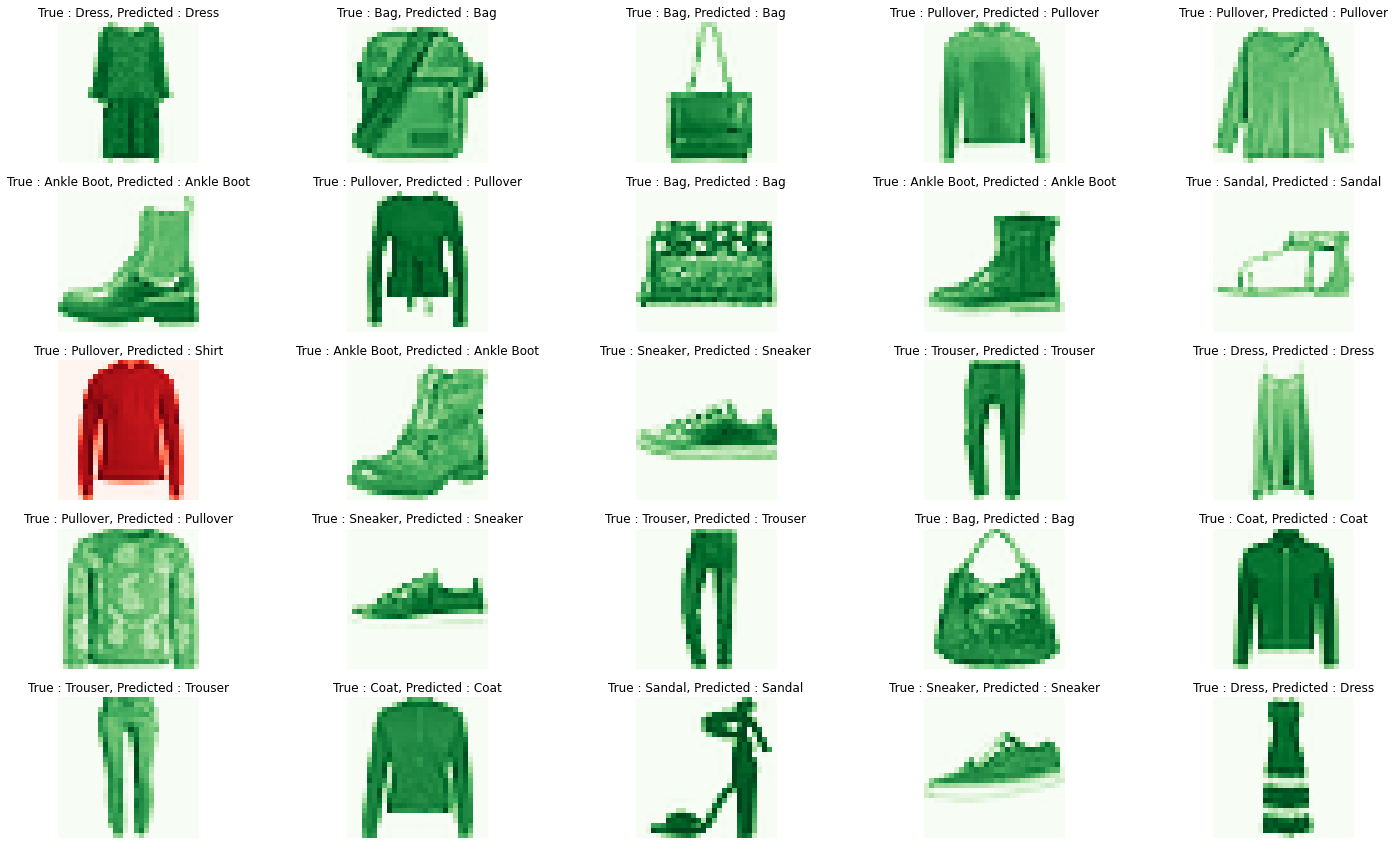

In [ ]:
PLOT_ROWS = 5
PLOT_COLS = 5

ims, lbls = get_samples(PLOT_ROWS*PLOT_COLS,df_test_images,df_test_labels)
f, ax = plt.subplots(PLOT_ROWS,PLOT_COLS, figsize=(PLOT_COLS*5,PLOT_ROWS*3))
for i, (img,lbl) in enumerate(zip(ims,lbls)):
    pred_img = np.argmax(nn.predict((img/255).reshape(-1,28,28,1)))
    if pred_img==lbl:
      cmap = "Greens"
    else:
      cmap = "Reds"
    ax[i//PLOT_COLS, i%PLOT_COLS].imshow(img, cmap=cmap)
    ax[i//PLOT_COLS, i%PLOT_COLS].axis('off')
    ax[i//PLOT_COLS, i%PLOT_COLS].set_title(f"True : {labels[lbl]}, Predicted : {labels[pred_img]}")
plt.show()